###Prepare the Dataset

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f'Training Image Size{x_train.shape}')
print(f'Training Target Size{y_train.shape}')
print(f'Testing Image Size{x_test.shape}')
print(f'Testing Target Size{y_test.shape}')

Training Image Size(50000, 32, 32, 3)
Training Target Size(50000, 1)
Testing Image Size(10000, 32, 32, 3)
Testing Target Size(10000, 1)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [ ]:
print(np.max(x_train))
print(np.min(x_train))

255
0


In [ ]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
print(np.max(x_train))
print(np.min(x_train))

1.0
0.0


###Define the model


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Reshape((32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),

    #output layer
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 reshape (Reshape)           (None, 32, 32, 3)         0         
                                                                 
 dense (Dense)               (None, 32, 32, 128)       512       
                                                                 
 dense_1 (Dense)             (None, 32, 32, 10)        1290      
                                                                 
Total params: 1802 (7.04 KB)
Trainable params: 1802 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile the Model

First let generate a prediction on a sample image

1/1 [==============================] - 0s 247ms/step


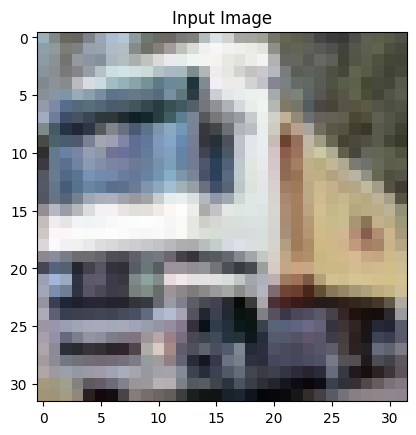

In [ ]:
viz_model = tf.keras.models.Sequential(model.layers[:3])

# Generate predictions on a sample image
sample_image = x_train[1]

sample_image = tf.expand_dims(sample_image, axis=0)
activations = viz_model.predict(sample_image)

# Plot the activations
plt.imshow(sample_image[0])
plt.title('Input Image')
plt.show()

In [ ]:
activations.shape

(1, 32, 32, 128)

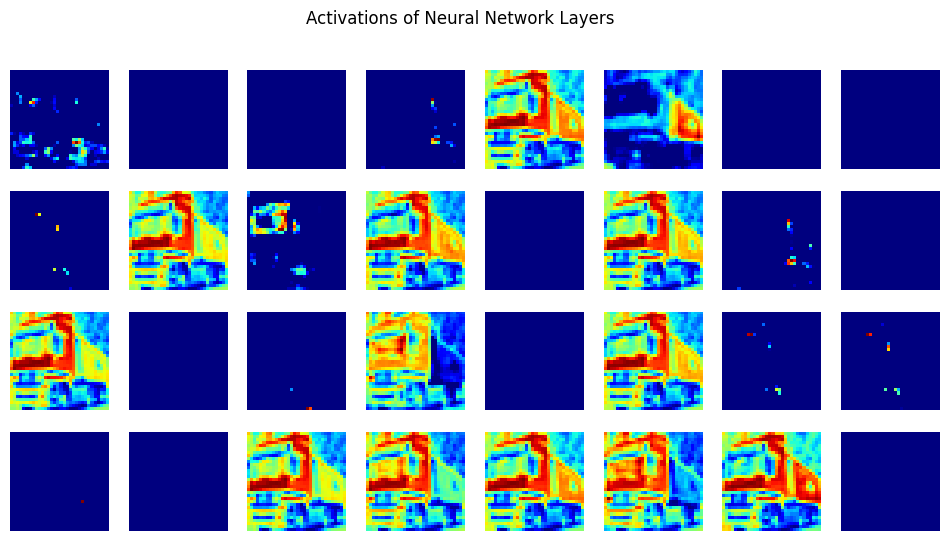

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(activations[0, :, :, i*4], cmap='jet')
    plt.axis('off')
plt.suptitle('Activations of Neural Network Layers')
plt.show()

###Compile and Fit the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10)
])

batch_size = 32
steps_per_epoch = len(x_train) // batch_size

model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test))

Epoch 1/10
1562/1562 [==============================] - 6s 4ms/step - loss: 8.7085 - accuracy: 0.1096 - val_loss: 9.6683 - val_accuracy: 0.1003
Epoch 2/10
1562/1562 [==============================] - 5s 3ms/step - loss: 10.8070 - accuracy: 0.1210 - val_loss: 12.4221 - val_accuracy: 0.1356
Epoch 3/10
1562/1562 [==============================] - 6s 4ms/step - loss: 12.4413 - accuracy: 0.1127 - val_loss: 12.3810 - val_accuracy: 0.1162
Epoch 4/10
1562/1562 [==============================] - 4s 3ms/step - loss: 12.3823 - accuracy: 0.1152 - val_loss: 12.3806 - val_accuracy: 0.1118
Epoch 5/10
1562/1562 [==============================] - 4s 3ms/step - loss: 12.5036 - accuracy: 0.1029 - val_loss: 12.7520 - val_accuracy: 0.1001
Epoch 6/10
1562/1562 [==============================] - 6s 4ms/step - loss: 12.4198 - accuracy: 0.1089 - val_loss: 12.3392 - val_accuracy: 0.1184
Epoch 7/10
1562/1562 [==============================] - 4s 3ms/step - loss: 12.6769 - accuracy: 0.1317 - val_loss: 13.5690 - v

In [ ]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Evaluate the Model

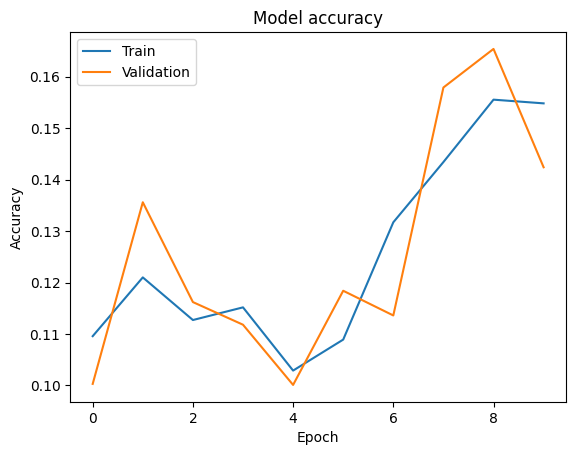

In [ ]:
# Plot accuracy on training & validation accuracy values over training epochs
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

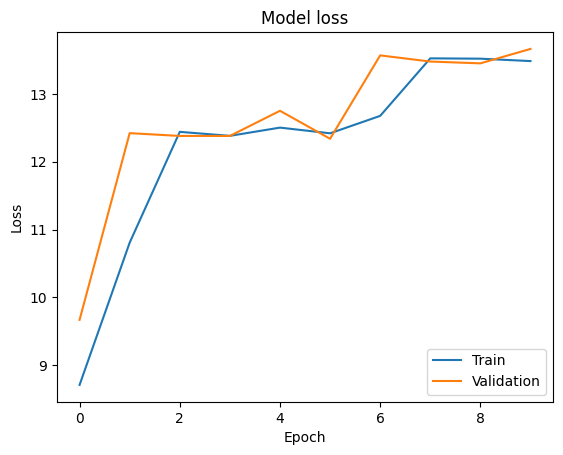

In [ ]:
# Plot loss on training & validation loss values over training epochs
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

###Defining the model using dropouts

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [ ]:
batch_size = 32
steps_per_epoch = len(x_train) // batch_size

model2.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                    epochs=10, batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test)
           )

Epoch 1/10
1562/1562 [==============================] - 43s 27ms/step - loss: 2.0133 - accuracy: 0.2510 - val_loss: 1.8487 - val_accuracy: 0.3219
Epoch 2/10
1562/1562 [==============================] - 42s 27ms/step - loss: 1.8924 - accuracy: 0.3066 - val_loss: 1.7911 - val_accuracy: 0.3494
Epoch 3/10
1562/1562 [==============================] - 42s 27ms/step - loss: 1.8593 - accuracy: 0.3212 - val_loss: 1.7878 - val_accuracy: 0.3579
Epoch 4/10
1562/1562 [==============================] - 41s 26ms/step - loss: 1.8379 - accuracy: 0.3263 - val_loss: 1.7412 - val_accuracy: 0.3743
Epoch 5/10
1562/1562 [==============================] - 41s 26ms/step - loss: 1.8161 - accuracy: 0.3382 - val_loss: 1.8211 - val_accuracy: 0.3404
Epoch 6/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.8064 - accuracy: 0.3438 - val_loss: 1.7334 - val_accuracy: 0.3802
Epoch 7/10
1562/1562 [==============================] - 40s 26ms/step - loss: 1.7971 - accuracy: 0.3471 - val_loss: 1.7044 -

### Evaluate the Model

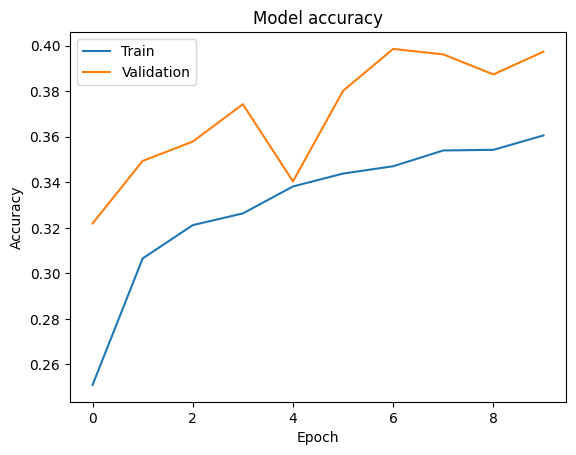

In [ ]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Great, this is beginning to look much better!

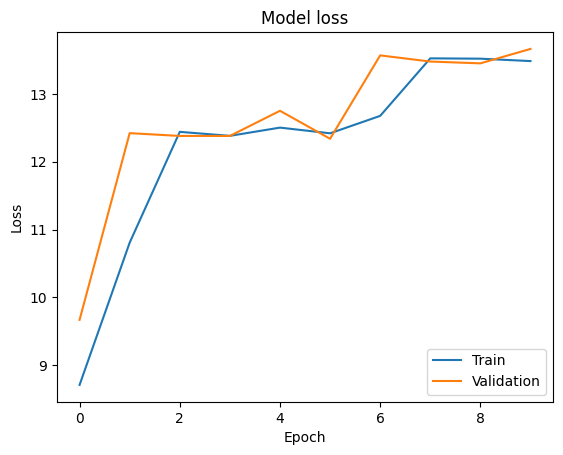

In [ ]:
# Plot loss on training & validation loss values over training epochs
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()